<a href="https://colab.research.google.com/github/ianbounos/brain-networks/blob/main/C_Elegans_Binary_Undirected_Graph_6_Hierarchical_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C Elegans - Binary undirected graph - Hierarchical Networks

"*Modular networks generally have small-world properties. Strong
within-module connectivity results in a high clustering coefficient, whereas a small number of intermodular links is sufficient to maintain a low characteristic path length of the network.*"

In [1]:

from google.colab import drive

# Mount Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [5]:
file_path = "/content/drive/My Drive/Grafos y Cerebro/celegans277matrix.csv"
adjacency_matrix = pd.read_csv(file_path, header=None)

# Create undirected graph from adjacency grapha
G = nx.DiGraph(adjacency_matrix.values)
G = G.to_undirected()



A first approach is to apply agglomerative hierarchical clustering with cosine similarity to the network.

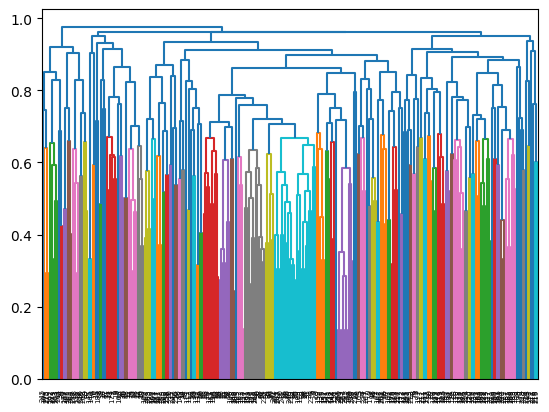

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist

# Calculate the linkage matrix with cosine similarity
distance_matrix = pdist(nx.to_numpy_array(G), metric='cosine')
linkage_matrix = linkage(distance_matrix, method='average')

# Determine clusters from the dendrogram
num_clusters = 4  # You can adjust this value as needed
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add cluster information as a node attribute in the graph
for i, node in enumerate(G.nodes()):
    G.nodes[node]['cluster'] = clusters[i]

# Create the dendrogram
dendrogram(linkage_matrix)



In [ ]:
df = pd.read_csv("/content/drive/My Drive/Grafos y Cerebro/celegans277positions.csv", header=None, names=['x', 'y'])

# Get the node positions as a matrix
positions = df[['x', 'y']].values



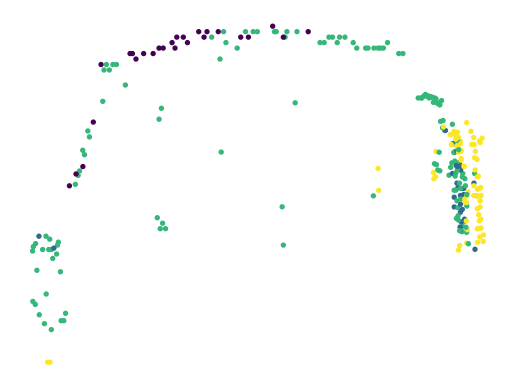

In [33]:
nx.draw_networkx_nodes(G, pos, node_size=8, node_color=clusters)
plt.axis('off')  # Turn off the axis
plt.show()

**Advantage**

A benefit of the hierarchical analyses we've explored so far is that they provide a comprehensive depiction of the interrelated connections between nodes, revealing the intricate, nested organization of modules across various scales, akin to fractals or Russian dolls. Another advantage is that they eliminate the need for predefining the precise number of clusters to be derived from the data. In contrast, alternative clustering techniques, like k-means clustering, necessitate such prior specifications.

**Disadvantage**

"*Despite its popularity and flexibility, hierarchical clustering can be an inaccurate
method for delineating modules in networks with known community structure. In
particular, Newman and Girvan (2004) consider how hierarchical clustering is bi-
ased toward grouping together the core nodes of a community at the expense of
peripheral nodes.*"


A drawback of hierarchical analyses is the inability to ascertain the relative validity or reliability of the clustering solution at one level compared to another. For instance, determining whether clustering voxels into 15 regions is superior to clustering into 100 regions remains unclear. It also raises the question of whether the optimal solution lies at the hierarchy's pinnacle, suggesting that all voxels should be consolidated into a single group.

**Further analysis**

There are more advanced methods for clustering and measuring modularity. These can be seen in detail in Chapter 9. Additionally, there is the Q metric, which measures how "modular" the graph is compared to one randomly generated with the same degree distribution in the nodes (configuration model). On the other hand, modularity allows us to create a classification of the nodes' roles. Temporal dynamics also play a role; sometimes networks change over time, allowing for different modules, especially in functional networks, which can change rapidly. This necessitates the use of multilayer networks.